In [26]:
"""
1) Quatro filhotes de coelhos são acompanhados ao parto anotando-se o sexo.
    a) Construir o espaço amostral de todas as possibilidades do registro
    dos sexos dos coelhos.
    b) Relacionar os eventos:
        - No máximo três fêmeas;
        - Pelo menos três fêmeas;
        - Exatamente três fêmeas; 
"""
from itertools import product


space = product('MF', repeat=4)
space = [''.join(x) for x in space]
print(space)
print(len(space))



count_max_3_femeas = 0
count_pelo_menos_3_femeas = 0
count_exatamente_3_femeas = 0
for x in space:
    count_femeas = x.count('F')
    if count_femeas <= 3:
        count_max_3_femeas += 1
    if count_femeas >= 3:
        count_pelo_menos_3_femeas += 1
    if count_femeas == 3:
        count_exatamente_3_femeas += 1
print(f"No máximo três fêmeas: {count_max_3_femeas}")
print(f"Pelo menos três: {count_pelo_menos_3_femeas}")
print(f"Exatamente três: {count_exatamente_3_femeas}")


['MMMM', 'MMMF', 'MMFM', 'MMFF', 'MFMM', 'MFMF', 'MFFM', 'MFFF', 'FMMM', 'FMMF', 'FMFM', 'FMFF', 'FFMM', 'FFMF', 'FFFM', 'FFFF']
16
No máximo três fêmeas: 15
Pelo menos três: 5
Exatamente três: 4


In [27]:
from math import exp, factorial
import numpy as np
import matplotlib.pyplot as plt

"""
14) Uma das máquinas florestais que faz a colheita é o Feller Buncher, que tem
seu ciclo operacional de 30 segundos, sendo que processa em média 5 árvores
por ciclo. Qual é a probabilidade que em um certo ciclo, o Feller Buncher
processe no mínimo 3 árvores?

"""


def poisson(k, lambda_):
    return exp(-lambda_) * lambda_**k / factorial(k)


def main():
    lambda_ = 5
    P0 = poisson(0, lambda_)
    P1 = poisson(1, lambda_)
    P2 = poisson(2, lambda_)
    prob_less_than_3 = P0 + P1 + P2
    result = (1 - prob_less_than_3) * 100
    print(f'{result:.2f}%')

main()
            

87.53%


99.92%


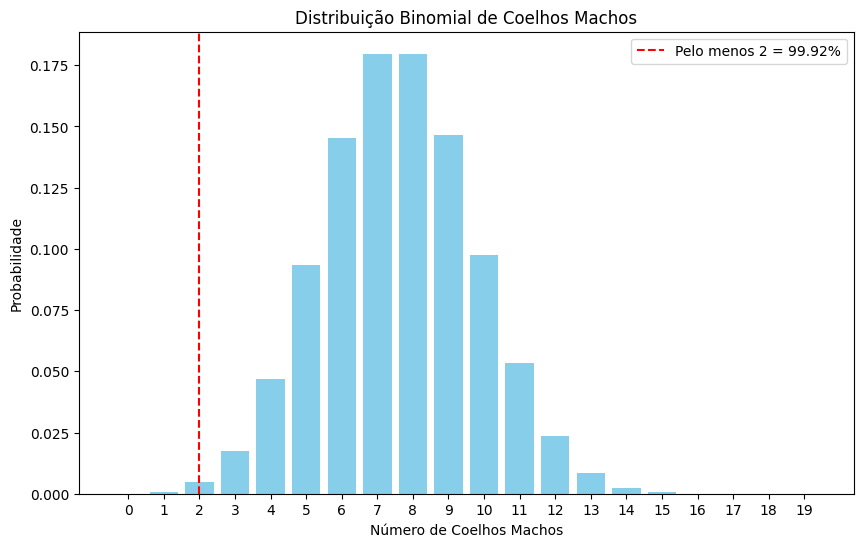

In [16]:
"""" 
15) Numa criação de coelhos, a taxa de nascimento de machos é de 40%. Qual
a probabilidade de que nasçam pelo menos dois coelhos machos, num dia que
nasceram 19 coelhos? Estruturar a função de probabilidade e representar a
distribuição graficamente. 
"""

def binomial_prob(n, p, k):
    return (factorial(n) / (factorial(k) * factorial(n - k))) * p**k * (1 - p)**(n - k)


def distribuition_chart(n, p):
    probabilidades = [binomial_prob(n, p, k) for k in range(n + 1)]
    prob_at_least_2 = sum(probabilidades[2:]) * 100
    plt.figure(figsize=(10, 6))
    plt.bar(range(n + 1), probabilidades, color='skyblue')
    plt.title('Distribuição Binomial de Coelhos Machos')
    plt.xlabel('Número de Coelhos Machos')
    plt.ylabel('Probabilidade')
    plt.xticks(range(n + 1))
    plt.axvline(x=2, color='red', linestyle='--', label=f'Pelo menos 2 = {prob_at_least_2:.2f}%')
    plt.legend()
    plt.show()


def main():
    n = 19
    p = 0.4
    P0 = binomial_prob(n, p, 0)
    P1 = binomial_prob(n, p, 1)
    prob_less_than_2 = P0 + P1
    result = (1 - prob_less_than_2) * 100
    print(f'{result:.2f}%')
    distribuition_chart(n, p)


main()


In [41]:
"""
16) Uma certa região florestal foi dividida em 109 quadrados para estudar a
distribuição de Primula sinensis. Supõe-se que esta espécie se distribui
aleatoriamente na região. A tabela abaixo indica o número de quadrados com X
Primula sinensis; o número médio de plantas por quadrado foi de 2,2 (encontre
esse valor).
"""

quadrados_por_plantas = {
    0: 26,
    1: 21,
    2: 23,
    3: 14,
    4: 11,
    5: 4,
    6: 5,
    7: 4,
    8: 1
}

# Calculando a média ponderada de plantas por quadrado
total_plantas = sum(x * n for x, n in quadrados_por_plantas.items())
total_quadrados = sum(quadrados_por_plantas.values())

# Média de plantas por quadrado
media_plantas = total_plantas / total_quadrados
print(f"Média das plantas: {media_plantas:.1f}")
print()
# a) Dê as frequências esperadas de quadrados para os valores 0, 1 e 2
# de X (utilize distribuição de Poisson).
lambda_ = 2.2
frequencia_esp_0 = poisson(0, lambda_) * 109
frequencia_esp_1 = poisson(1, lambda_) * 109
frequencia_esp_2 = poisson(2, lambda_) * 109

print(f'Frequência esperada para 0: {frequencia_esp_0:.2f}')
print(f'Frequência esperada para 1: {frequencia_esp_1:.2f}')
print(f'Frequência esperada para 2: {frequencia_esp_2:.2f}')
print()
# b) Se as p'lantas se distribuem aleatoriamente na região, qual a
# probabilidade de encontrarmos pelo menos duas Primulas num
# quadrante?'
P0 = poisson(0, lambda_)
P1 = poisson(1, lambda_)
prob_less_than_2 = P0 + P1
result = (1 - prob_less_than_2) * 100
print(f'A probabilidade de pelo menos 2: {result:.2f}%')

# c) Apenas comparando os resultados de “b” com as frequências
# observadas, podemos concluir que a distribuição da espécie é aleatória?

"""
Comparando os resultados obtidos com as frequências observadas na tabela:

0 plantas: 26 observados vs. 12.08 esperados
1 planta: 21 observados vs. 26.57 esperados
2 plantas: 23 observados vs. 29.23 esperados
Podemos ver que há uma diferença entre as frequências observadas e as esperadas. 
Especificamente, há mais quadrados com 0 plantas e menos com 1 e 2 plantas do que 
o esperado pela distribuição de Poisson. Isso pode sugerir que a distribuição de Primula sinensis 
não é completamente aleatória, uma vez que há uma maior tendência de encontrar quadrados vazios do que o modelo de Poisson prevê.
Para concluir definitivamente se a distribuição é aleatória ou não, seria ideal realizar um teste de aderência, 
como o teste de qui-quadrado, para comparar as frequências observadas com as esperadas e determinar se as diferenças são estatisticamente significativas.
"""

Média das plantas: 2.2

Frequência esperada para 0: 12.08
Frequência esperada para 1: 26.57
Frequência esperada para 2: 29.23

A probabilidade de pelo menos 2: 64.54%


In [18]:
"""
18) Segundo a teoria de Mendel, no enxerto de duas espécies de plantas com
flores amarelas e brancas, 30% das plantas resultantes têm flor amarela. Em
sete pares de plantas enxertadas, qual a probabilidade:
a) de não resultar nenhuma flor amarela?
b) de haver quatro ou mais plantas com flor amarela?
"""

def main():
    n = 7
    p = 0.3
    P0 = binomial_prob(n, p, 0)
    P1 = binomial_prob(n, p, 1)
    P2 = binomial_prob(n, p, 2)
    P3 = binomial_prob(n, p, 3)
    prob_no_yellow = P0 * 100
    prob_4_or_more = (1 - (P0 + P1 + P2 + P3)) * 100
    print(f'a) {prob_no_yellow:.2f}%')
    print(f'b) {prob_4_or_more:.2f}%')
    
main()

a) 8.24%
b) 12.60%


In [47]:
"""
    1) Sendo Z uma variável aleatória contínua com distribuição normal padrão,
    determine (e demonstre na curva):
    a) P(0<Z<2,1) b) P(0<Z<0,65) c) P(-1,78<Z<0)
    d) P(-2,84<Z<1,4) e) P(1,32<Z<2,35) f) P(Z>-1,75)
"""

z_values = {
    'a': (0, 2.1),
    'b': (0, 0.65),
    'c': (-1.78, 0),
    'd': (-2.84, 1.4),
    'e': (1.32, 2.35),
    'f': (-1.75, float('inf'))  # Representando Z > -1.75
}

# Calculando as probabilidades para cada intervalo
probabilidades = {key: norm.cdf(z[1]) - norm.cdf(z[0]) for key, z in z_values.items()}

# Para o caso 'f' onde temos P(Z > -1.75), ajustamos a probabilidade
probabilidades['f'] = 1 - norm.cdf(z_values['f'][0])

probabilidades


{'a': 0.48213557943718344,
 'b': 0.24215388919413527,
 'c': 0.4624620196514832,
 'd': 0.9169876640746866,
 'e': 0.08403080345863323,
 'f': 0.9599408431361829}

c:\Users\limei\Documents\05_VSCode\masters-statistics\venv\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step


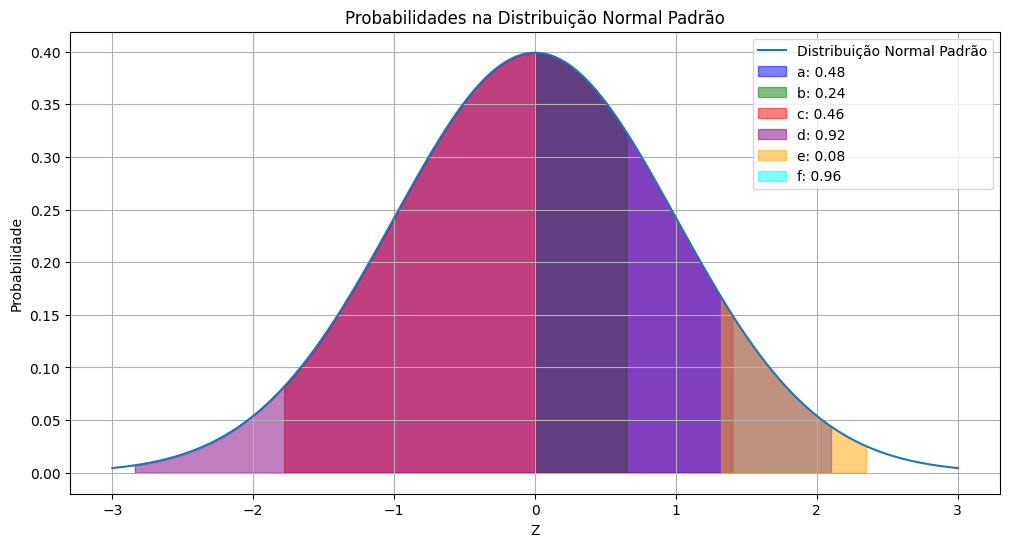

In [48]:
# Valores para o gráfico
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x)

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Distribuição Normal Padrão')

# Áreas sob a curva para cada intervalo
cores = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
for (i, (key, z)) in enumerate(z_values.items()):
    x_fill = np.linspace(z[0], z[1], 500)
    y_fill = norm.pdf(x_fill)
    plt.fill_between(x_fill, y_fill, color=cores[i], alpha=0.5, label=f'{key}: {probabilidades[key]:.2f}')

plt.title('Probabilidades na Distribuição Normal Padrão')
plt.xlabel('Z')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid(True)

plt.show()

In [42]:
from scipy.stats import norm
"""
    3) Em um povoamento florestal temos uma distribuição normal de DAP das
    árvores, com média 12,6 cm e desvio padrão de 3,1 cm. Se cortarmos todas as
    árvores com menos de 15 cm de DAP, qual a percentagem de árvores que
    restarão em pé?
"""


# Parâmetros da distribuição normal
media = 12.6  # média de DAP em cm
desvio_padrao = 3.1  # desvio padrão do DAP em cm
corte = 15  # DAP em cm para corte

# Calculando a proporção de árvores com DAP de 15 cm ou mais
# Usando a CDF para calcular a proporção de árvores com menos de 15 cm de DAP
proporcao_menor_15 = norm.cdf(corte, media, desvio_padrao)

# A proporção de árvores com 15 cm ou mais é o complemento disso
proporcao_15_ou_mais = 1 - proporcao_menor_15

# Convertendo a proporção em percentagem
percentagem_15_ou_mais = proporcao_15_ou_mais * 100
percentagem_15_ou_mais

21.940817147329007

In [43]:
"""
4) Foi feito um estudo sobre a altura de plantas de milho de certo híbrido,
observando-se que ela se distribui normalmente com média igual a 2,2 m e
desvio padrão igual a 0,20m. Qual a percentagem de plantas com altura entre:

a) Entre 2,15 m e 2,25 m
b) Entre 2,00 m e 2,40 m
c) Acima de 2,30 m

"""

# Parâmetros da distribuição normal
media_altura = 2.2  # média de altura em metros
desvio_padrao_altura = 0.20  # desvio padrão de altura em metros

# Calculando a percentagem de plantas em cada intervalo
# a) Entre 2,15 m e 2,25 m
prob_2_15_a_2_25 = norm.cdf(2.25, media_altura, desvio_padrao_altura) - norm.cdf(2.15, media_altura, desvio_padrao_altura)

# b) Entre 2,00 m e 2,40 m
prob_2_00_a_2_40 = norm.cdf(2.40, media_altura, desvio_padrao_altura) - norm.cdf(2.00, media_altura, desvio_padrao_altura)

# c) Acima de 2,30 m
prob_acima_2_30 = 1 - norm.cdf(2.30, media_altura, desvio_padrao_altura)

# Convertendo as probabilidades em percentagens
percentagem_2_15_a_2_25 = prob_2_15_a_2_25 * 100
percentagem_2_00_a_2_40 = prob_2_00_a_2_40 * 100
percentagem_acima_2_30 = prob_acima_2_30 * 100

percentagem_2_15_a_2_25, percentagem_2_00_a_2_40, percentagem_acima_2_30


(19.74126513658476, 68.26894921370858, 30.853753872598755)

In [44]:
"""
10) Uma progênie de erva-mate apresenta produtividade média de 7,9
kg/planta e variância de 0,97 kg/pl2
. Suponha que a distribuição seja normal,
calcule e demonstre em gráfico a probabilidade de uma planta:
a) Ter produtividade maior do que 9 kg
b) Ter produtividade maior do que 8 kg e menor do que 9,5 kg
c) Produtividade menor do que 7 kg
d) Produtividade maior do que 6,5 kg e menor do que 8,5 kg
e) Produtividade maior do que 6,5 kg
f) Produtividade maior do que 5 kg e menor do que 7 kg
"""

import numpy as np
from scipy.stats import norm

# Parâmetros da distribuição normal
media_producao = 7.9  # média de produtividade em kg/planta
variancia_producao = 0.97  # variância em kg^2/planta^2
desvio_padrao_producao = np.sqrt(variancia_producao)  # desvio padrão em kg/planta

# a) Probabilidade de produtividade maior que 9 kg
prob_maior_9 = 1 - norm.cdf(9, media_producao, desvio_padrao_producao)

# b) Probabilidade de produtividade maior que 8 kg e menor que 9,5 kg
prob_entre_8_9_5 = norm.cdf(9.5, media_producao, desvio_padrao_producao) - norm.cdf(8, media_producao, desvio_padrao_producao)

# c) Probabilidade de produtividade menor que 7 kg
prob_menor_7 = norm.cdf(7, media_producao, desvio_padrao_producao)

# d) Probabilidade de produtividade maior que 6,5 kg e menor que 8,5 kg
prob_entre_6_5_8_5 = norm.cdf(8.5, media_producao, desvio_padrao_producao) - norm.cdf(6.5, media_producao, desvio_padrao_producao)

# e) Probabilidade de produtividade maior que 6,5 kg
prob_maior_6_5 = 1 - norm.cdf(6.5, media_producao, desvio_padrao_producao)

# f) Probabilidade de produtividade maior que 5 kg e menor que 7 kg
prob_entre_5_7 = norm.cdf(7, media_producao, desvio_padrao_producao) - norm.cdf(5, media_producao, desvio_padrao_producao)

# Resultados
prob_maior_9, prob_entre_8_9_5, prob_menor_7, prob_entre_6_5_8_5, prob_maior_6_5, prob_entre_5_7

(0.1320226514226115,
 0.4074342125864482,
 0.18040793854204118,
 0.6512186519271689,
 0.9224120408033729,
 0.17879057408329518)

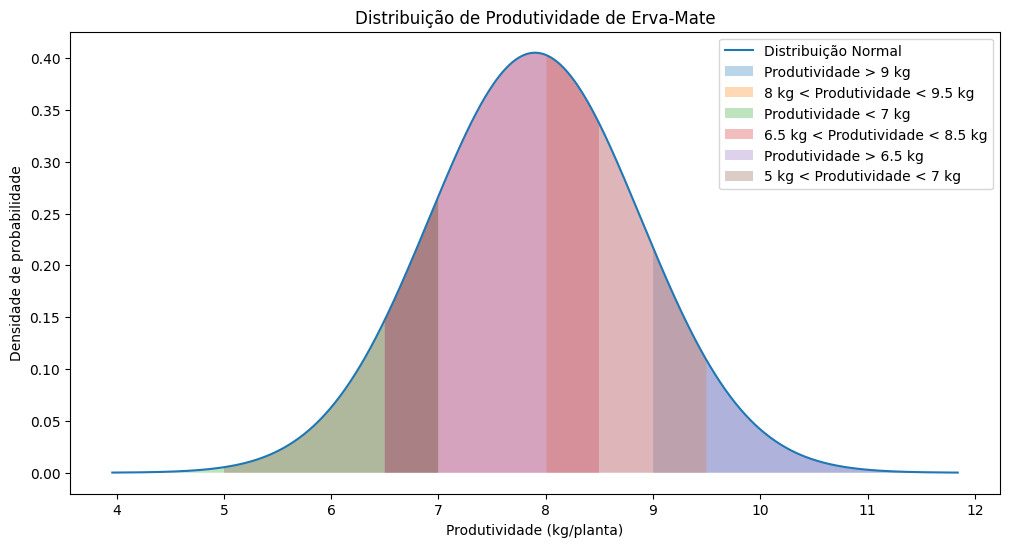

In [45]:
import matplotlib.pyplot as plt

# Valores para o gráfico
x_values = np.linspace(media_producao - 4*desvio_padrao_producao, media_producao + 4*desvio_padrao_producao, 1000)
y_values = norm.pdf(x_values, media_producao, desvio_padrao_producao)

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, label='Distribuição Normal')
plt.fill_between(x_values, y_values, where=(x_values > 9), alpha=0.3, label='Produtividade > 9 kg')
plt.fill_between(x_values, y_values, where=((x_values > 8) & (x_values < 9.5)), alpha=0.3, label='8 kg < Produtividade < 9.5 kg')
plt.fill_between(x_values, y_values, where=(x_values < 7), alpha=0.3, label='Produtividade < 7 kg')
plt.fill_between(x_values, y_values, where=((x_values > 6.5) & (x_values < 8.5)), alpha=0.3, label='6.5 kg < Produtividade < 8.5 kg')
plt.fill_between(x_values, y_values, where=(x_values > 6.5), alpha=0.3, label='Produtividade > 6.5 kg')
plt.fill_between(x_values, y_values, where=((x_values > 5) & (x_values < 7)), alpha=0.3, label='5 kg < Produtividade < 7 kg')

plt.title('Distribuição de Produtividade de Erva-Mate')
plt.xlabel('Produtividade (kg/planta)')
plt.ylabel('Densidade de probabilidade')
plt.legend()

plt.show()

In [ ]:
"""
Confidence Interval
Confidence Interval = x(+/-)t*(s/√n)

"""

In [2]:
"""
9) Baseando-se nos dados de uma amostra de biomassa de raízes de mudas
de candeia (em gramas), obter:
    a) As medidas de posição (média, mediana e moda) dos dados não
    agrupados.
    b) Fazer uma tabela de frequência e o histograma de frequência relativa.
    Caracterize a simetria da distribuição baseado no coeficiente de assimetria e
    curtose.
    c) Obter as medidas de posição (média, mediana e moda) dos dados
    agrupados.
"""

import numpy as np
from scipy.stats import mode

# Dados fornecidos
dados = np.array([1.0, 1.8, 1.9, 2.1, 2.3, 2.3, 2.4, 2.5, 2.6, 2.6, 2.6, 2.8, 2.8, 2.9, 3.0])

# Calculando média, mediana e moda
media = np.mean(dados)
mediana = np.median(dados)
moda, count = mode(dados)

media, mediana, moda

(2.373333333333334, 2.5, 2.6)

In [3]:
from scipy.stats import skew

assimetria = skew(dados)

print("Coeficiente de Assimetria:", assimetria)

Coeficiente de Assimetria: -1.248369026478463


In [5]:
# curtose
from scipy.stats import kurtosis

curtose = kurtosis(dados)
print("Curtose:", curtose)

Curtose: 1.3428483759030403


Curtose: inf


C:\Users\limei\AppData\Local\Temp\ipykernel_12492\88825426.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  curtose = np.mean((dados - media)**4) / ((media - dados.mean())**2 * dados.std()**4) - 3
